In [96]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
#from pycaret.classification import *
from pycaret.regression import *
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
#df1 = pd.read_csv('data.csv')
#df = pd.read_csv('Kindle_Reviews_latest.csv')
#df1.head(3)

,actual_ratings,reviewText,summary,verified,vote
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0
2,5,"Love Max, always a fun twist",Five Stars,True,0


In [97]:
df = pd.read_csv('data.csv')

df.head(5)

,actual_ratings,reviewText,summary,verified,vote
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0
2,5,"Love Max, always a fun twist",Five Stars,True,0
3,5,"As usual for him, a good book",a good,True,0
4,5,MB is one of the original western writers and ...,A Western,True,2


In [98]:
df.rename({'overall': 'actual_ratings'}, axis=1, inplace=True)

In [99]:
df.head(3)

,actual_ratings,reviewText,summary,verified,vote
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0
2,5,"Love Max, always a fun twist",Five Stars,True,0


In [100]:
#Convert a collection of text documents to a matrix of token counts.
#implements both tokenization and occurrence counting in a single class:
tf_vectorizer = CountVectorizer(max_features=800,stop_words={'english'}, ngram_range=(1,1))

In [101]:
features = tf_vectorizer.fit_transform(df['reviewText'].apply(lambda features : np.str_(features)))

In [102]:
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [ ]:
#print("Vocabulary: ", tf_vectorizer.vocabulary_)

In [103]:
features_df.head(5)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,written,wrong,wrote,year,years,yes,yet,you,young,your
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [104]:
new_df = pd.concat([features_df,df['actual_ratings']],axis=1)
new_df.head(5)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,actual_ratings
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5


In [105]:
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [106]:
numerical_features = list(features_df.columns)
#numerical_features

In [107]:
#the setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

exp_regr = setup(data = new_train_df, target = 'actual_ratings',numeric_features=numerical_features,session_id=123) 

,Description,Value
0,session_id,123
1,Target,actual_ratings
2,Original Data,"(750, 801)"
3,Missing Values,False
4,Numeric Features,800
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(524, 790)"


In [108]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.8621,1.2131,1.0984,0.0714,0.2772,0.3452,0.3270
br,Bayesian Ridge,0.8856,1.2426,1.1113,0.0546,0.2798,0.3604,0.5240
lightgbm,Light Gradient Boosting Machine,0.8712,1.2576,1.1184,0.0368,0.2762,0.3410,0.2840
rf,Random Forest Regressor,0.8841,1.2876,1.1328,0.0097,0.2819,0.3557,0.9110
en,Elastic Net,0.9061,1.3213,1.1471,-0.0083,0.2861,0.3674,0.0230
lasso,Lasso Regression,0.9064,1.3275,1.1497,-0.0126,0.2865,0.3673,0.0290
dummy,Dummy Regressor,0.9066,1.3356,1.1530,-0.0182,0.2868,0.3670,0.0240
llar,Lasso Least Angle Regression,0.9066,1.3356,1.1530,-0.0182,0.2868,0.3670,0.0240
ada,AdaBoost Regressor,0.9935,1.3680,1.1678,-0.0504,0.2809,0.3524,0.1790
et,Extra Trees Regressor,0.9112,1.3914,1.1770,-0.0746,0.2879,0.3539,1.0850


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8831,1.1706,1.0819,-0.0824,0.2479,0.2873
1,0.7902,1.0449,1.0222,0.0364,0.2505,0.2775
2,0.9423,1.4611,1.2088,-0.0079,0.3109,0.4163
3,0.7847,1.0264,1.0131,0.1012,0.2465,0.2841
4,0.7341,0.9906,0.9953,0.2815,0.2736,0.3420
5,0.9719,1.4765,1.2151,0.0644,0.3107,0.3974
6,0.9106,1.4737,1.2140,0.0144,0.3233,0.4487
7,0.8753,1.0751,1.0369,0.1124,0.2391,0.2907
8,0.9233,1.2012,1.0960,0.0122,0.2754,0.3355


In [111]:
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:

top_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.8621,1.2131,1.0984,0.0714,0.2772,0.3452,0.3650
br,Bayesian Ridge,0.8856,1.2426,1.1113,0.0546,0.2798,0.3604,0.5300
lightgbm,Light Gradient Boosting Machine,0.8712,1.2576,1.1184,0.0368,0.2762,0.3410,0.0700
rf,Random Forest Regressor,0.8841,1.2876,1.1328,0.0097,0.2819,0.3557,0.9350
en,Elastic Net,0.9061,1.3213,1.1471,-0.0083,0.2861,0.3674,0.0240
lasso,Lasso Regression,0.9064,1.3275,1.1497,-0.0126,0.2865,0.3673,0.0250
dummy,Dummy Regressor,0.9066,1.3356,1.1530,-0.0182,0.2868,0.3670,0.0210
llar,Lasso Least Angle Regression,0.9066,1.3356,1.1530,-0.0182,0.2868,0.3670,0.0240
ada,AdaBoost Regressor,0.9935,1.3680,1.1678,-0.0504,0.2809,0.3524,0.2020
et,Extra Trees Regressor,0.9112,1.3914,1.1770,-0.0746,0.2879,0.3539,1.1370


In [113]:
top_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
tuned_model = tune_model(top_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8776,1.0678,1.0333,0.0127,0.2374,0.2836
1,0.8456,1.0325,1.0161,0.0479,0.2436,0.2932
2,0.9553,1.4314,1.1964,0.0126,0.3092,0.4178
3,0.8020,0.9929,0.9964,0.1306,0.2436,0.2908
4,0.8053,1.1874,1.0897,0.1387,0.2933,0.3805
5,0.9649,1.4374,1.1989,0.0891,0.3082,0.4181
6,0.9284,1.4732,1.2137,0.0147,0.3221,0.4482
7,0.9244,1.1314,1.0637,0.0659,0.2470,0.3083
8,0.8853,1.1309,1.0634,0.0700,0.2656,0.3352


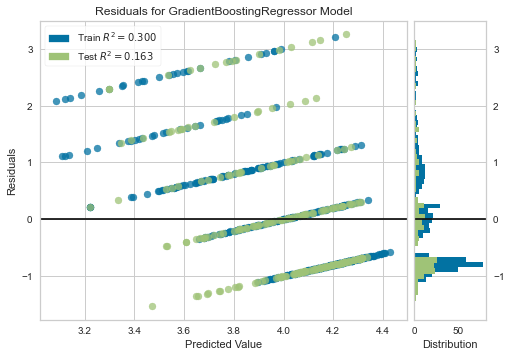

In [115]:
plot_model(tuned_model)

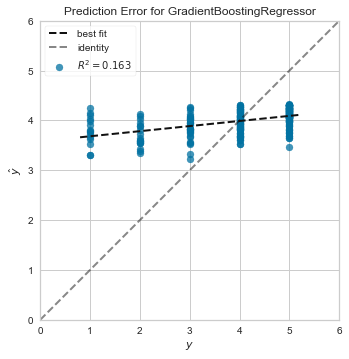

In [116]:
plot_model(tuned_model, plot = 'error')

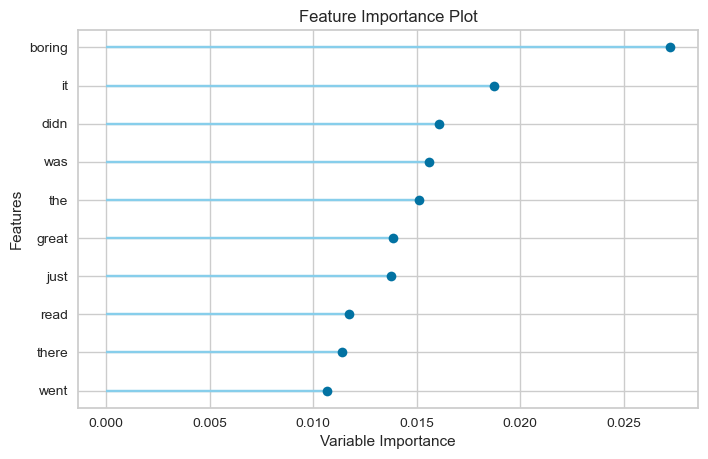

In [117]:
plot_model(tuned_model, plot='feature')

In [62]:
#evaluate_model(tuned_model);

In [118]:
predict_model(tuned_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.8734,1.2398,1.1135,0.1627,0.2911,0.3807


In [119]:
unseen_predictions = predict_model(tuned_model, data=new_test_df)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.8855,1.2576,1.1214,0.1191,0.2905,0.3805


,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrote,year,years,yes,yet,you,young,your,actual_ratings,Label
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,4,4.022582
393,0,0,0,0,0,0,0,2,0,2,...,0,0,0,1,0,1,0,0,1,3.298362
636,0,0,0,2,1,0,0,0,3,1,...,0,0,0,0,0,0,0,0,5,3.607071
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,3.643243
673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4.140017


In [120]:
save_model(tuned_model,"deployment_review_to_ratings_04122022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['19th', '20th',
                                                           'abagnale', 'able',
                                                           'about', 'absolutely',
                                                           'academy', 'account',
                                                           'action', 'actual',
                                                           'actually',
                                                           'adventure', 'after',
                                                           'again', 'against',
                                                           'age', 'ago', 'all',
                    

In [84]:
model = load_model('deployment_review_to_ratings_04082022')

Transformation Pipeline and Model Successfully Loaded


In [86]:
prediction =  predict_model(model,data = new_test_df ,round =0)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1,1,1,0,0,0


In [ ]:
cols = ['reviewText']
records = [['This book is very good']]
input_df = pd.DataFrame(data=records,columns=cols)
input_df
12:10
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())
12:10
predict_model(estimator = final_model,data=features_df)

In [87]:
cols = ['reviewText']
records = [['This book is very good']]
input_df = pd.DataFrame(data=records,columns=cols)

In [88]:
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [ ]:
predict_model(estimator = model,data=new_train_df)

In [122]:
columns_name = list(new_train_df.columns)

In [126]:
new_train_df.shape

(750, 801)

In [123]:
columns_name

['19th',
 '20th',
 'abagnale',
 'able',
 'about',
 'absolutely',
 'academy',
 'account',
 'action',
 'actual',
 'actually',
 'adventure',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'all',
 'allison',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'american',
 'amount',
 'an',
 'and',
 'anita',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'argeneau',
 'around',
 'articles',
 'as',
 'at',
 'attention',
 'author',
 'authors',
 'available',
 'away',
 'back',
 'bad',
 'bank',
 'based',
 'battle',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'bed',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believe',
 'bennie',
 'best',
 'better',
 'between',
 'big',
 'birthday',
 'bit',
 'bite',
 'black',
 'bliss',
 'blood',
 'book',
 'books',
 'boring',
 'both',
 'bought',
 'bourgeoisie',
 'brennan',
 'brief',
 'bring',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'came',
 'can',
 'cannot',
 'capital